# Python Finance

### IDEX Example

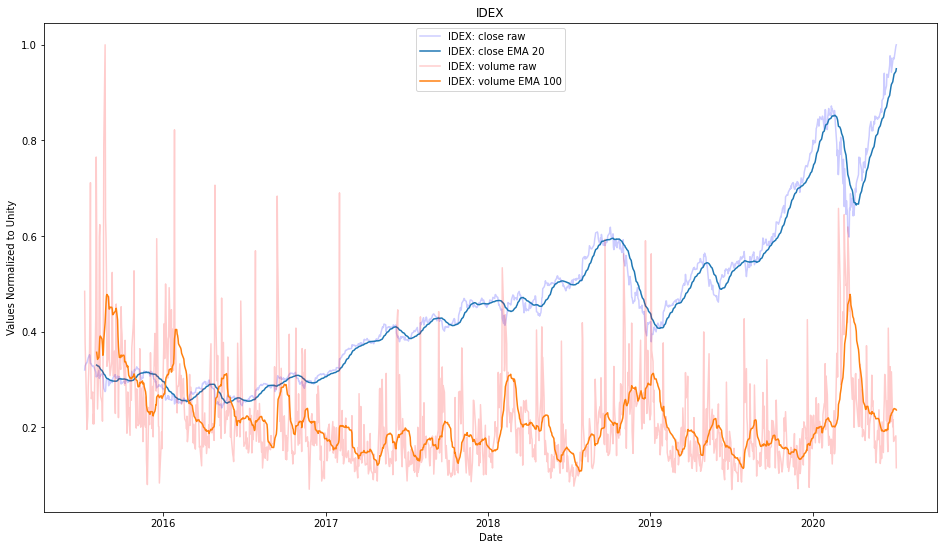

In [265]:
from pandas_datareader import data
import matplotlib.pyplot as plt

# get one column of data
#idex_vol = data.DataReader("AAPL", data_source='yahoo')['Volume']

# get full data data
idex_data = data.DataReader("AAPL", data_source='yahoo')

# break data up by column
idex_vol = idex_data['Volume']
idex_close = idex_data['Close']
#idex_adjclose = idex_data['Adj Close']

# normalize data
idex_vol = idex_vol / max(idex_vol)
idex_close = idex_close / max(idex_close)

# Smooth Data using EMA
idex_close_smooth20 = idex_close.rolling(window=20).mean()
idex_vol_smooth20 = idex_vol.rolling(window=20).mean()

# smoothing parameter is variable...try:
#long_rolling_idex = idex_close.rolling(window=100).mean()

####################
# Plot Data
####################
fig, ax = plt.subplots(figsize=(16,9))

# plot close value data
ax.plot(idex_close, color='b', label='IDEX: close raw', alpha=0.2)
ax.plot(idex_close_smooth20, label='IDEX: close EMA 20')

# plot volume data
ax.plot(idex_vol.index, idex_vol, color='r', label='IDEX: volume raw', alpha=0.2)
ax.plot(idex_vol_smooth20, label='IDEX: volume EMA 100')

# add labels
ax.set_xlabel('Date')
ax.set_ylabel('Values Normalized to Unity')
ax.set_title('IDEX')
# add legend
ax.legend()

----
----
### AAPLE Example

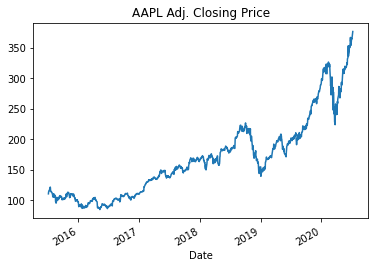

In [166]:
from pandas_datareader import data
import matplotlib.pyplot as plt

# Only get the adjusted close.
aapl_data = data.DataReader("AAPL", data_source='yahoo')
aapl_adjclose = aapl_data['Adj Close']
aapl_adjclose.plot(title='AAPL Adj. Closing Price')

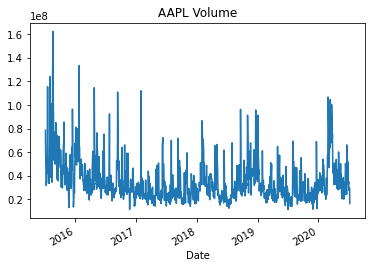

In [167]:
volume_aapl = aapl_data['Volume']
volume_aapl.plot(title='AAPL Volume')

### Closing
Plot closing price, adjusted closing price, and smoothed closing price.

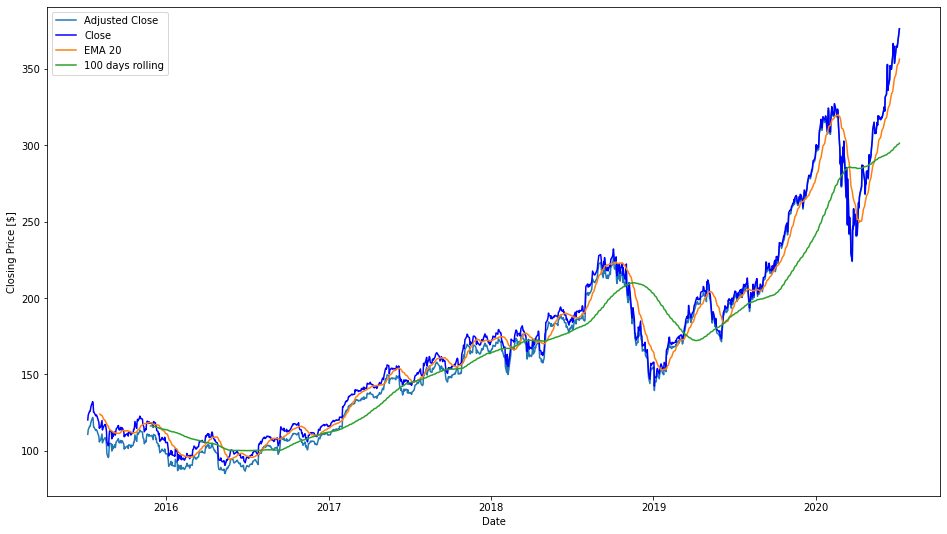

In [168]:
adjclose = aapl_data['Adj Close']
aapl_close = aapl_data['Close']


short_rolling_aapl = aapl_close.rolling(window=20).mean()
long_rolling_aaple = aapl_close.rolling(window=100).mean()

fig, ax = plt.subplots(figsize=(16,9))

plt.plot(adjclose.index, adjclose, label='Adjusted Close')
plt.plot(aapl_close, label='Close', color='b')
plt.plot(short_rolling_aapl, label='EMA 20')
plt.plot(long_rolling_aaple.index, long_rolling_aaple, label='100 days rolling')

plt.xlabel('Date')
plt.ylabel('Closing Price [$]')
plt.legend()

### Returns

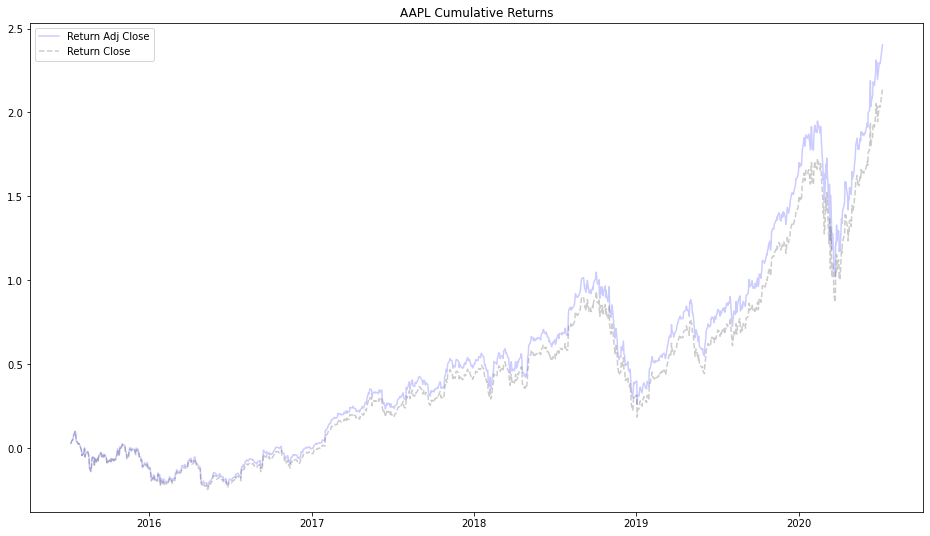

In [205]:
aapl_data = data.DataReader("AAPL", data_source='yahoo')
aapl_adjclose = aapl_data['Adj Close']
aapl_close = aapl_data['Close']


returns_adj = aapl_adjclose.pct_change()
returns_adj = ((1 + returns_adj).cumprod() - 1)

returns_close = aapl_close.pct_change()
returns_close = ((1 + returns_close).cumprod() - 1)


fig, ax = plt.subplots(figsize=(16,9))

ax.plot(returns_adj, label='Return Adj Close', alpha=0.2, color='b')
ax.plot(returns_close.index, returns_close, 'k--', label='Return Close', alpha=0.2)

ax.set_title('AAPL Cumulative Returns')
ax.legend()

### Volume

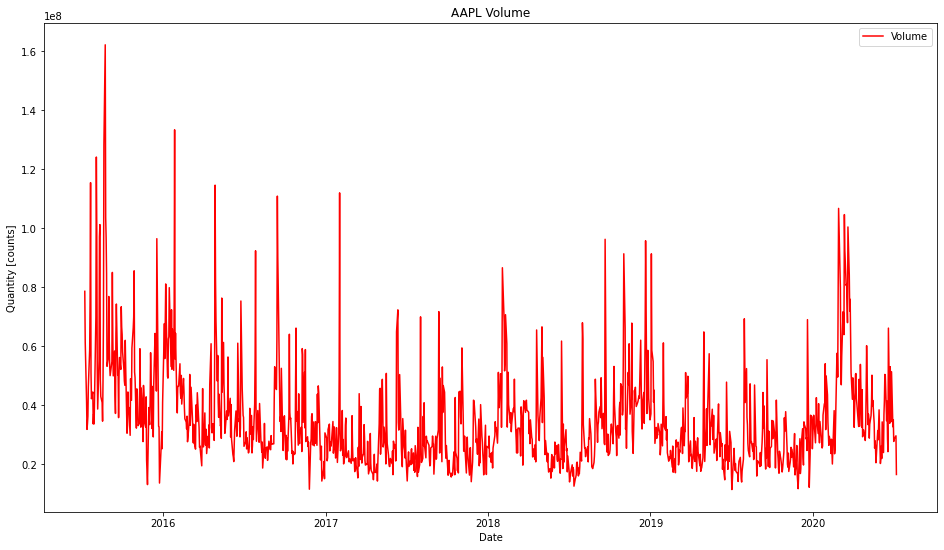

In [170]:
aapl_volume = aapl_data['Volume']

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(aapl_volume, label='Volume', color='r')


ax.set_xlabel('Date')
ax.set_ylabel('Quantity [counts]')
ax.set_title('AAPL Volume')

ax.legend()

Apply smoothing to volume data.

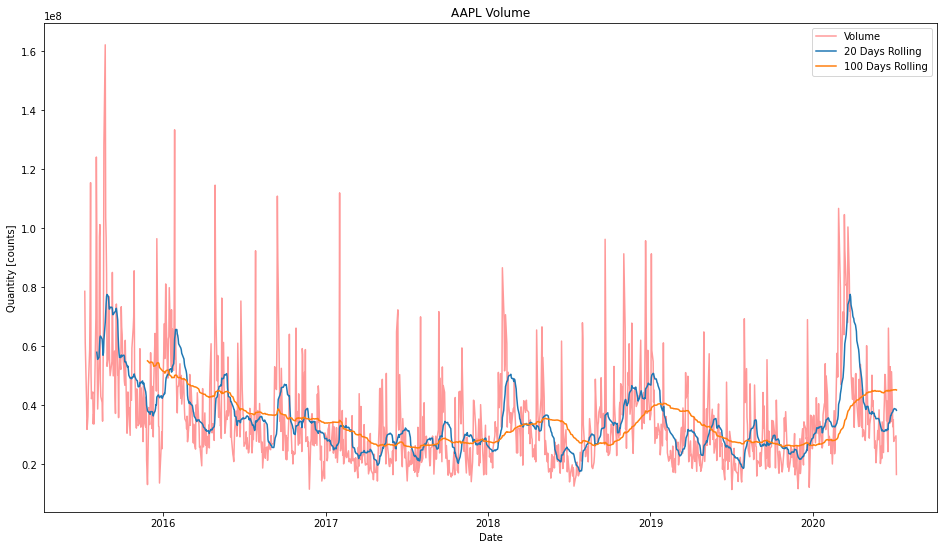

In [171]:
aapl_volume = aapl_data['Volume']

short_rolling_aapl = aapl_volume.rolling(window=20).mean()
long_rolling_aaple = aapl_volume.rolling(window=100).mean()

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(aapl_volume.index, aapl_volume, label='Volume', alpha=0.4, color='r')
ax.plot(short_rolling_aapl, label='20 Days Rolling')
ax.plot(long_rolling_aaple, label='100 Days Rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Quantity [counts]')
ax.set_title('AAPL Volume')

ax.legend()

### Normalize to Unity

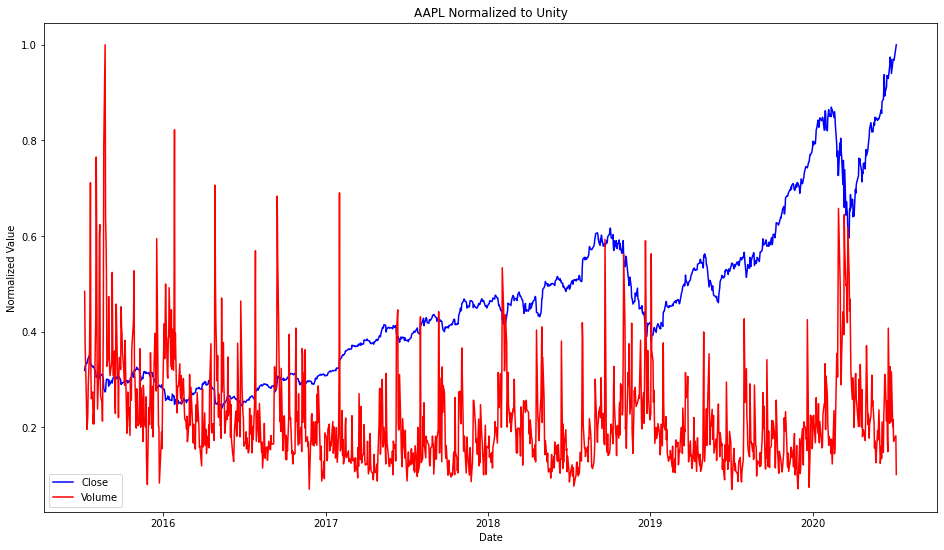

In [172]:
#adjclose = aapl_data['Adj Close']
aapl_close = aapl_data['Close']
aapl_volume = aapl_data['Volume']

# normalize to unity
aapl_close_norm = aapl_close/max(aapl_close)
aapl_volume_norm = aapl_volume/max(aapl_volume)

# set up plot
fig, ax = plt.subplots(figsize=(16,9))

# plot normalized data
ax.plot(aapl_close_norm, label='Close', color='b')
ax.plot(aapl_volume_norm, label='Volume', color='r')

# set labels
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Value')
ax.set_title('AAPL Normalized to Unity')

ax.legend()

Apply smoothing to normalized data.

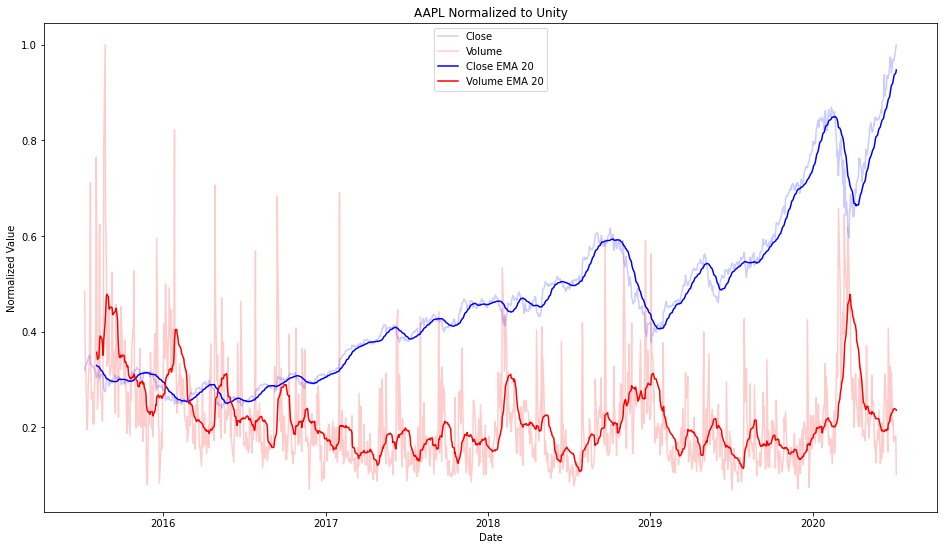

In [173]:
#adjclose = aapl_data['Adj Close']
aapl_close = aapl_data['Close']
aapl_volume = aapl_data['Volume']

# normalize to unity
aapl_close_norm = aapl_close/max(aapl_close)
aapl_volume_norm = aapl_volume/max(aapl_volume)

roll20_norm_close = aapl_close_norm.rolling(window=20).mean()
roll20_norm_volume = aapl_volume_norm.rolling(window=20).mean()
#long_rolling_aaple = aapl_volume.rolling(window=100).mean()

fig, ax = plt.subplots(figsize=(16,9))

# plot normalized data
ax.plot(aapl_close_norm.index, aapl_close_norm, label='Close', alpha=0.2, color='b')
ax.plot(aapl_volume_norm.index, aapl_volume_norm, label='Volume', alpha=0.2, color='r')
# plot normalized data with EMA applied
ax.plot(roll20_norm_close, label='Close EMA 20', color='b')
ax.plot(roll20_norm_volume, label='Volume EMA 20', color='r')

ax.set_xlabel('Date')
ax.set_ylabel('Normalized Value')
ax.set_title('AAPL Normalized to Unity')

ax.legend()

### Look For Correlations
(idk)

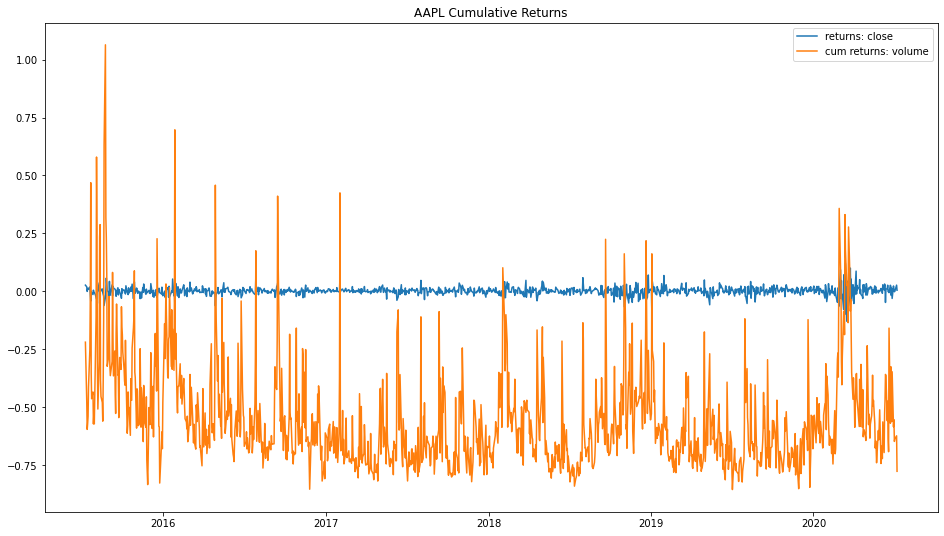

In [241]:
aapl_data = data.DataReader("AAPL", data_source='yahoo')
aapl_close = aapl_data['Close']
aapl_volume = aapl_data['Volume']


returns = aapl_close.pct_change()
#returns = (1 + returns).cumprod() - 1

returns_vol = aapl_volume.pct_change()
cumreturn_vol = (1 + returns_vol).cumprod() - 1

fig, ax = plt.subplots(figsize=(16,9))

#ax.plot(returns_vol, label='returns: volume')
ax.plot(returns, label='returns: close')
ax.plot(cumreturn_vol.index,cumreturn_vol, label='cum returns: volume')

ax.set_title('AAPL Cumulative Returns')
ax.legend()

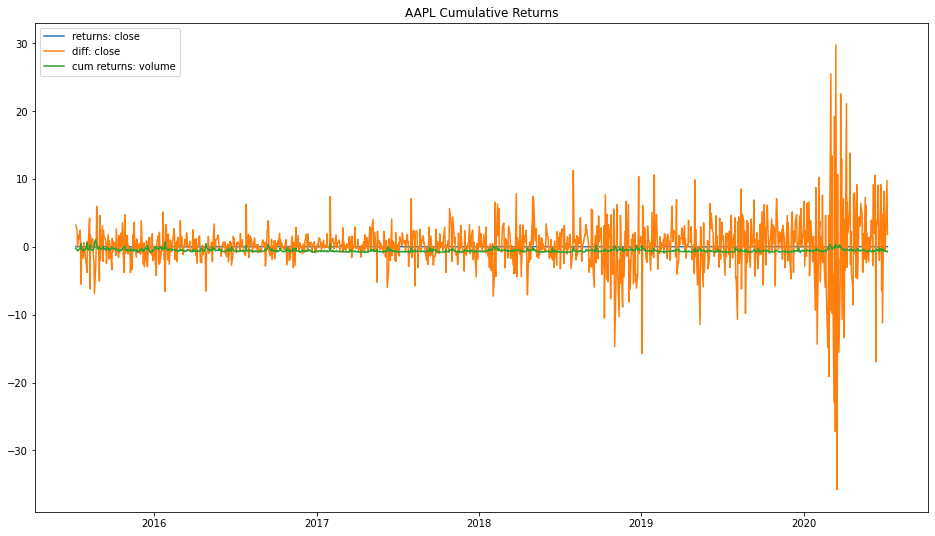

In [263]:
aapl_data = data.DataReader("AAPL", data_source='yahoo')
aapl_close = aapl_data['Close']
aapl_volume = aapl_data['Volume']

diff_close = aapl_close.diff()
returns = aapl_close.pct_change()
#diff_vol = aapl_volume.diff()

returns_vol = aapl_volume.pct_change()
cumreturn_vol = (1 + returns_vol).cumprod() - 1

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(returns, label='returns: close')
#ax.plot(diff_vol, label='diff: volume')
#ax.plot(returns_vol, label='diff: volume')
ax.plot(diff_close, label='diff: close')
ax.plot(cumreturn_vol.index,cumreturn_vol, label='cum returns: volume')

#ax.set_ylim(-10,10)
ax.set_title('AAPL Cumulative Returns')
ax.legend()

----
----
----
## Example 1


 [here.](https://learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/)

In [175]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

Get data.

Their example used `'google'` but needed to be switched to `'yahoo'`, in order to work.

In [176]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2016-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
#panel_data = data.DataReader('INPX', 'google', start_date, end_date)
# switch to yahoo
panel_data = data.DataReader('INPX', 'yahoo', start_date, end_date)

Preping data

In [177]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

In [178]:
print(all_weekdays)

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=1826, freq='B')


In [179]:
#close.head(10)
close

2010-01-01         NaN
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
                ...   
2016-12-26    187920.0
2016-12-27    217890.0
2016-12-28    214650.0
2016-12-29    225990.0
2016-12-30    197640.0
Freq: B, Name: Close, Length: 1826, dtype: float64

Looking at data.

In [180]:
close.describe()

count    1.151000e+03
mean     1.646350e+06
std      1.694051e+06
min      1.328400e+05
25%      4.483350e+05
50%      1.053000e+06
75%      2.344950e+06
max      1.053000e+07
Name: Close, dtype: float64

### Rolling Average =? EMA

In [181]:
"""
# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.
msft = close.loc[:, 'MSFT']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
"""

"\n# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.\nmsft = close.loc[:, 'MSFT']\n\n# Calculate the 20 and 100 days moving averages of the closing prices\nshort_rolling_msft = msft.rolling(window=20).mean()\nlong_rolling_msft = msft.rolling(window=100).mean()\n\n# Plot everything by leveraging the very powerful matplotlib package\nfig, ax = plt.subplots(figsize=(16,9))\n\nax.plot(msft.index, msft, label='MSFT')\nax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')\nax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')\n\nax.set_xlabel('Date')\nax.set_ylabel('Adjusted closing price ($)')\nax.legend()\n"

----
## Example 2
Example two can be found [here.](https://stackoverflow.com/questions/46307608/issues-downloading-stock-data-from-google-finance-using-panda-datareader)

In [182]:
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override() 

symbol = 'AMZN'
data_source='google'
start_date = '2010-01-01'
end_date = '2016-01-01'
df = data.get_data_yahoo(symbol, start_date, end_date)

df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
2010-01-08,130.559998,133.679993,129.029999,133.520004,133.520004,9830500


----
## Example 3
Example three can be found [here.](https://riptutorial.com/pandas/example/6232/datareader-basic-example--yahoo-finance-)

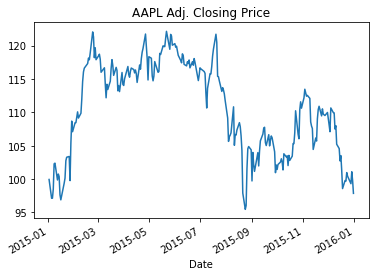

In [163]:
from pandas_datareader import data

# Only get the adjusted close.
aapl = data.DataReader("AAPL", 
                       start='2015-1-1', 
                       end='2015-12-31', 
                       data_source='yahoo')['Adj Close']

aapl.plot(title='AAPL Adj. Closing Price')

Convert the adjusted closing prices to cumulative returns.

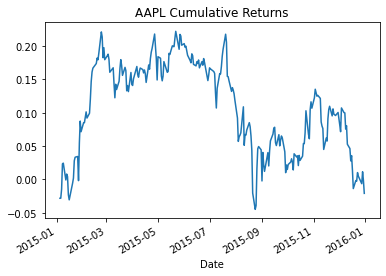

In [164]:
returns = aapl.pct_change()
((1 + returns).cumprod() - 1).plot(title='AAPL Cumulative Returns')

----
## Demo (broken)
[Reading financial data (for multiple tickers) into pandas panel - demo](https://riptutorial.com/pandas/example/9041/reading-financial-data--for-multiple-tickers--into-pandas-panel---demo)



In [165]:
from datetime import datetime
import pandas_datareader.data as wb

stocklist = ['AAPL','GOOG','FB','AMZN','COP']

start = datetime(2016,6,8)
end = datetime(2016,6,11)

p = wb.DataReader(stocklist, 'yahoo',start,end)

`p` - is a pandas panel...lets see what we can do with our panel

In [183]:
p

Attributes  Adj Close                          ...    Volume                  
Symbols          AAPL        GOOG          FB  ...        FB     AMZN      COP
Date                                           ...                            
2016-06-08  93.051048  728.280029  118.389999  ...  14505600  2223400  9641000
2016-06-09  93.718796  728.580017  118.559998  ...  13859200  2170300  5425100
2016-06-10  92.947609  719.409973  116.620003  ...  18510800  3425700  9008300

[3 rows x 30 columns]

In [184]:
p.axes

[DatetimeIndex(['2016-06-08', '2016-06-09', '2016-06-10'], dtype='datetime64[ns]', name='Date', freq=None),
 MultiIndex([('Adj Close', 'AAPL'),
             ('Adj Close', 'GOOG'),
             ('Adj Close',   'FB'),
             ('Adj Close', 'AMZN'),
             ('Adj Close',  'COP'),
             (    'Close', 'AAPL'),
             (    'Close', 'GOOG'),
             (    'Close',   'FB'),
             (    'Close', 'AMZN'),
             (    'Close',  'COP'),
             (     'High', 'AAPL'),
             (     'High', 'GOOG'),
             (     'High',   'FB'),
             (     'High', 'AMZN'),
             (     'High',  'COP'),
             (      'Low', 'AAPL'),
             (      'Low', 'GOOG'),
             (      'Low',   'FB'),
             (      'Low', 'AMZN'),
             (      'Low',  'COP'),
             (     'Open', 'AAPL'),
             (     'Open', 'GOOG'),
             (     'Open',   'FB'),
             (     'Open', 'AMZN'),
             (     'Open',  

In [185]:
p.keys()

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'GOOG'),
            ('Adj Close',   'FB'),
            ('Adj Close', 'AMZN'),
            ('Adj Close',  'COP'),
            (    'Close', 'AAPL'),
            (    'Close', 'GOOG'),
            (    'Close',   'FB'),
            (    'Close', 'AMZN'),
            (    'Close',  'COP'),
            (     'High', 'AAPL'),
            (     'High', 'GOOG'),
            (     'High',   'FB'),
            (     'High', 'AMZN'),
            (     'High',  'COP'),
            (      'Low', 'AAPL'),
            (      'Low', 'GOOG'),
            (      'Low',   'FB'),
            (      'Low', 'AMZN'),
            (      'Low',  'COP'),
            (     'Open', 'AAPL'),
            (     'Open', 'GOOG'),
            (     'Open',   'FB'),
            (     'Open', 'AMZN'),
            (     'Open',  'COP'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'GOOG'),
            (   'Volume',   'FB'),
            (   'Vol

Select data by slicing it

In [186]:
p['Adj Close']

Symbols,AAPL,GOOG,FB,AMZN,COP
Date,,,,,
2016-06-08,93.051048,728.280029,118.389999,726.640015,43.360901
2016-06-09,93.718796,728.580017,118.559998,727.650024,42.520893
2016-06-10,92.947609,719.409973,116.620003,717.909973,40.639992


In [187]:
p['Volume']

Symbols,AAPL,GOOG,FB,AMZN,COP
Date,,,,,
2016-06-08,20848100,1583700,14505600,2223400,9641000
2016-06-09,26601400,988900,13859200,2170300,5425100
2016-06-10,31712900,1216400,18510800,3425700,9008300


In [190]:
p[:,:,'AAPL']

KeyError: ignored

In [189]:
p[:,'2016-06-10']

TypeError: ignored